In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
!pip install kaggle


In [9]:
!mkdir ~/.kaggle


In [10]:
!cp kaggle.json ~/.kaggle/

In [11]:
!chmod 700 ~/.kaggle/kaggle.json

In [12]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

 97% 64.0M/66.0M [00:03<00:00, 32.0MB/s]
100% 66.0M/66.0M [00:03<00:00, 22.0MB/s]


In [13]:
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [83]:
pd.set_option('display.max_columns', 500)

In [84]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [85]:
df.shape

(284807, 31)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Handling missing values**

In [87]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

Checking the distribution of the classes

In [88]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [89]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [90]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

We can see that there is only 0.17% frauds. We will take care of the class imbalance later

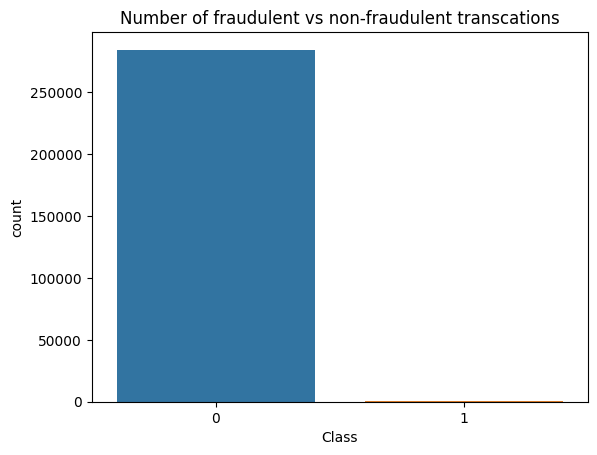

In [91]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()


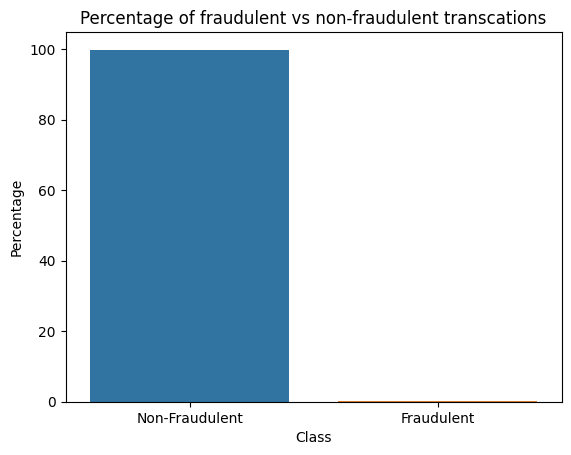

In [92]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

Observe the distribution of classes with time

In [93]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

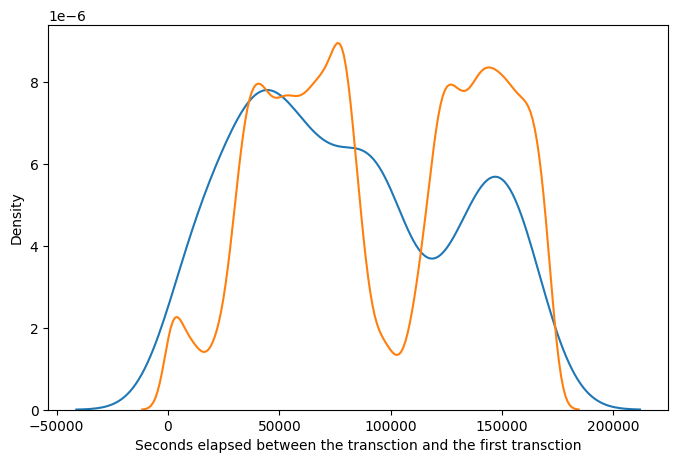

In [94]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()


We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [95]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

Observe the distribution of classes with amount

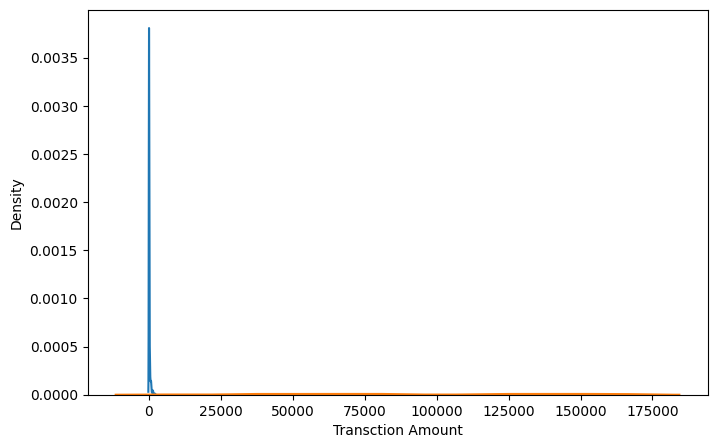

In [96]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

Train-Test Split

In [97]:
# Import library
from sklearn.model_selection import train_test_split


In [98]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [99]:
# Putting target variable to y
y = df['Class']

In [101]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

Checking the Skewness

In [34]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

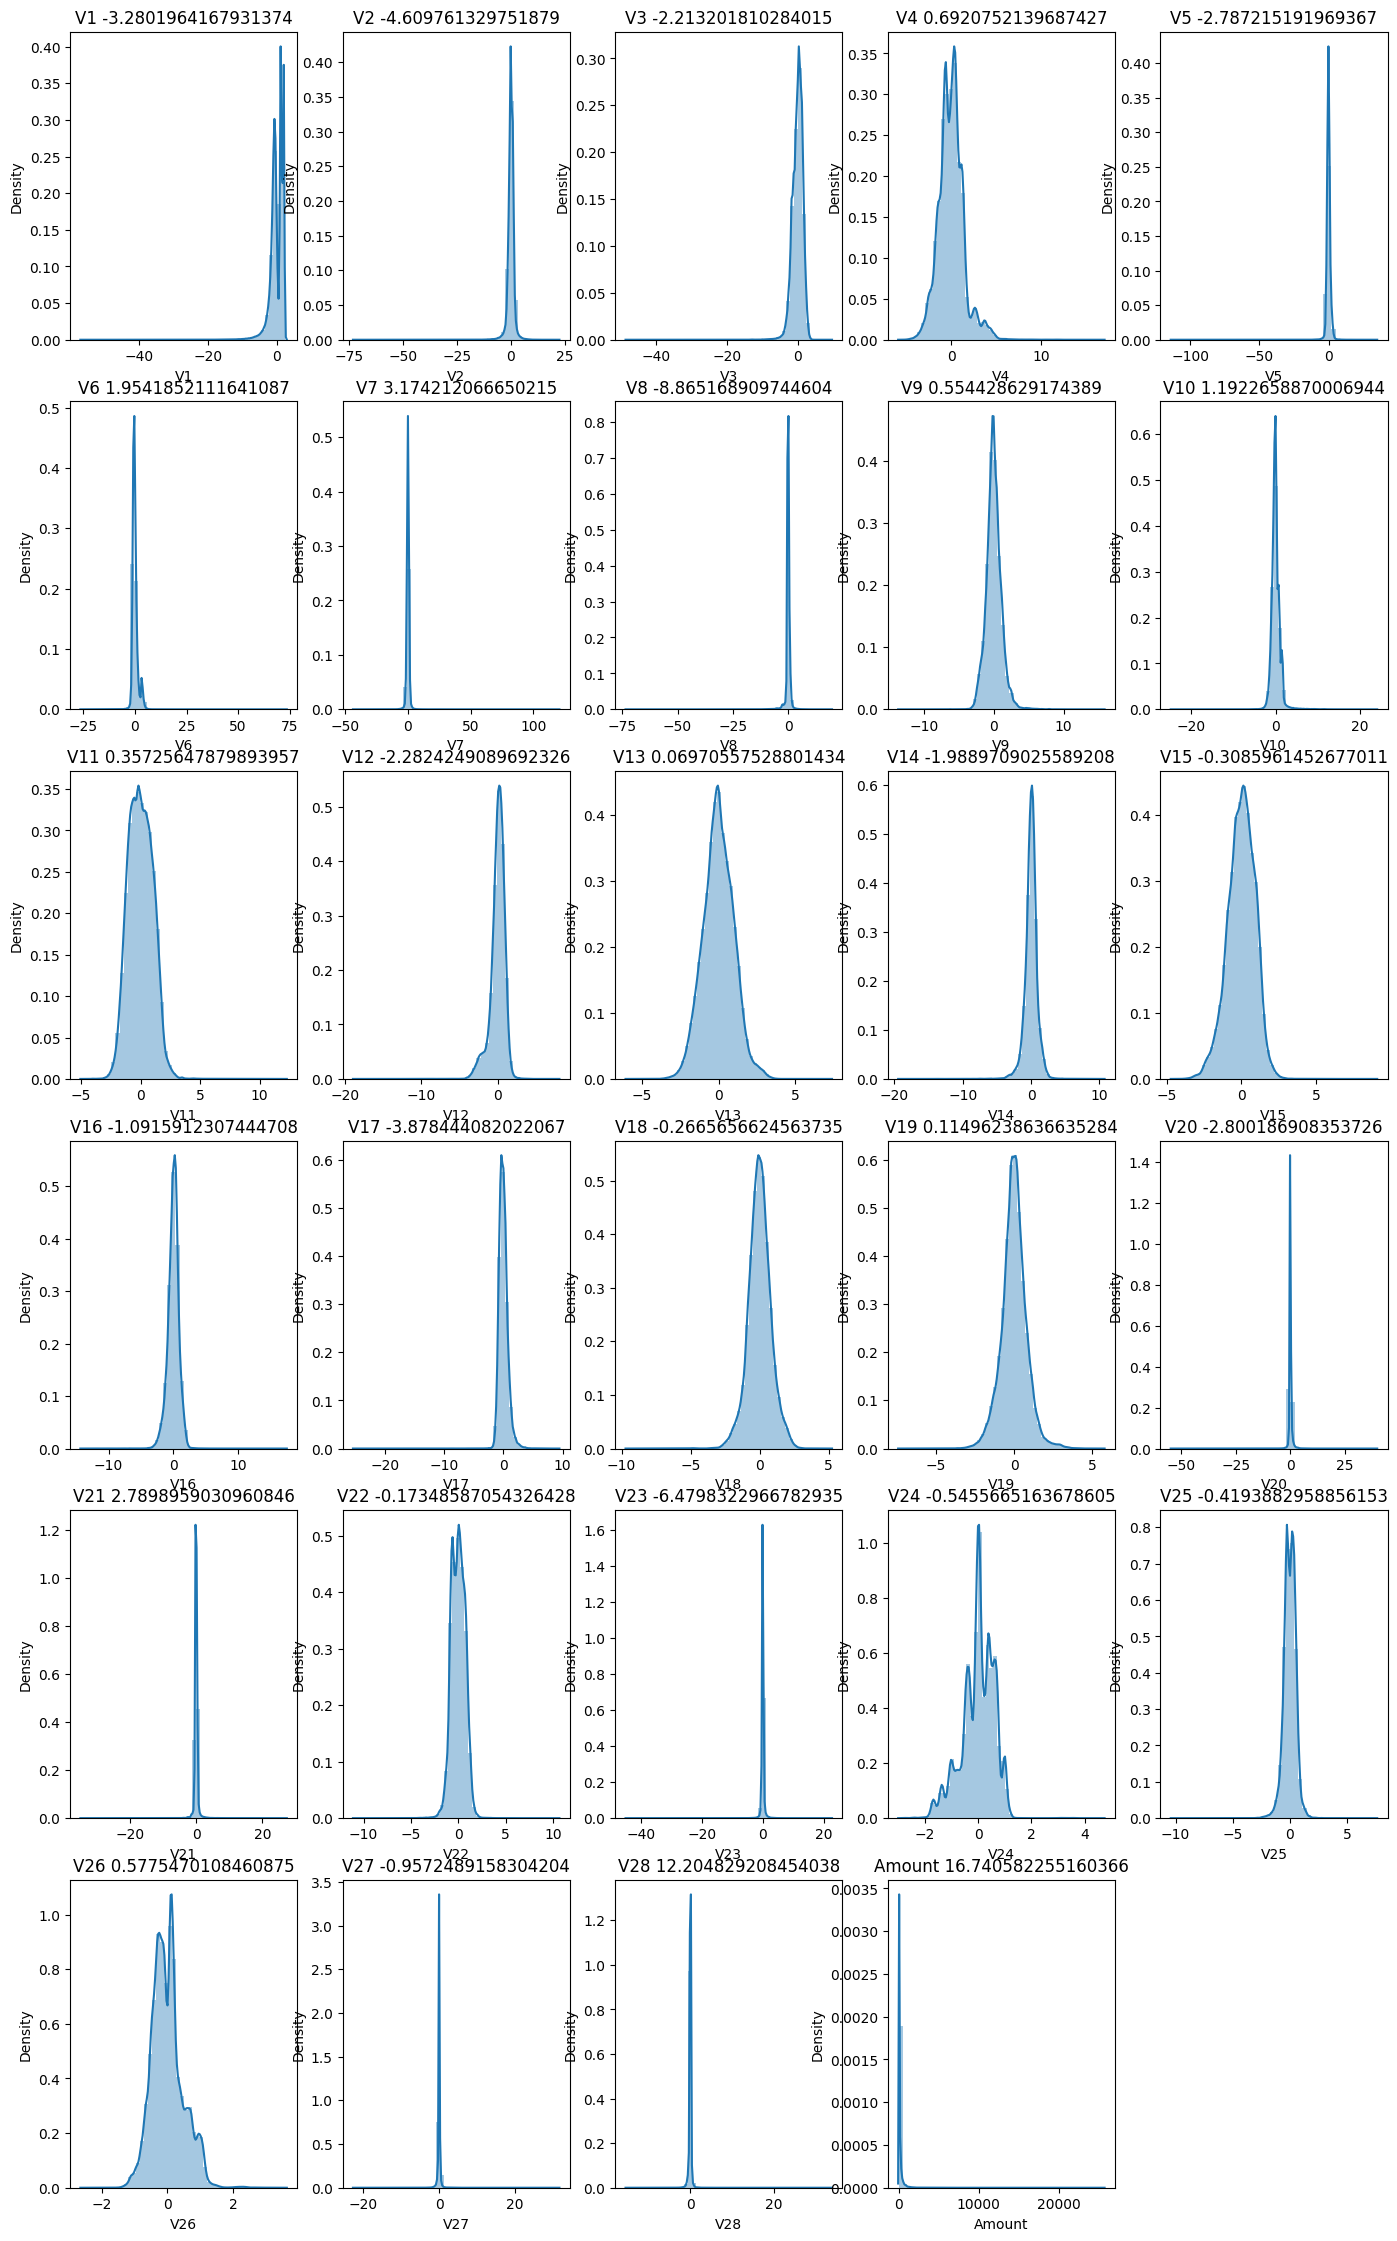

In [35]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Model building on imbalanced data

As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

Hence, we have to measure the ROC-AUC score for fair evaluation of the model. The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds.

Logistic regression

In [102]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [103]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

Tuning hyperparameter C

C is the the inverse of regularization strength in Logistic Regression.

 Higher values of C correspond to less regularization.

In [104]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [105]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [106]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.592190,0.736166,0.031114,0.010998,0.01,{'C': 0.01},0.987580,0.983902,0.956698,0.980237,0.995094,0.980702,0.012970,1,0.974115,0.982809,0.986776,0.980418,0.977837,0.980391,0.004302
1,4.053714,0.421470,0.028307,0.003252,0.1,{'C': 0.1},0.959326,0.965943,0.922917,0.941942,0.984060,0.954838,0.020893,4,0.960845,0.958918,0.967759,0.952312,0.949027,0.957772,0.006585
2,4.390920,0.816495,0.030927,0.008091,1,{'C': 1},0.958063,0.958004,0.901653,0.953258,0.990489,0.952293,0.028601,6,0.959587,0.952928,0.960476,0.953356,0.954642,0.956198,0.003193
3,4.232585,0.774645,0.025834,0.000712,10,{'C': 10},0.955994,0.964685,0.903392,0.954354,0.990727,0.953830,0.028384,5,0.951335,0.963648,0.962079,0.957171,0.956471,0.958141,0.004379
4,4.020712,0.519358,0.035003,0.011753,100,{'C': 100},0.972384,0.966529,0.912542,0.942987,0.990350,0.956959,0.026880,2,0.963187,0.960378,0.962526,0.947529,0.953953,0.957515,0.005965
5,4.458100,0.702715,0.026183,0.000481,1000,{'C': 1000},0.967942,0.965736,0.909508,0.955314,0.978993,0.955499,0.024194,3,0.962692,0.963753,0.961056,0.961218,0.952692,0.960282,0.003923


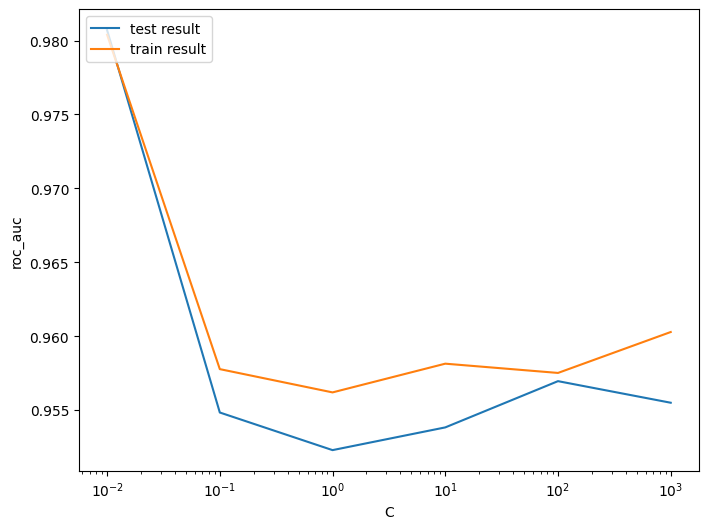

In [107]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [108]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9807024741620743 at C = 0.01


Logistic regression with optimal C

In [109]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [110]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

Prediction on the train set

In [113]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)


In [114]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227424     25]
 [   153    243]]


In [115]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992187671443306
Sensitivity:- 0.6136363636363636
Specificity:- 0.9998900852498802
F1-Score:- 0.7319277108433735


In [117]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.91      0.61      0.73       396

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



ROC on the train set

In [118]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

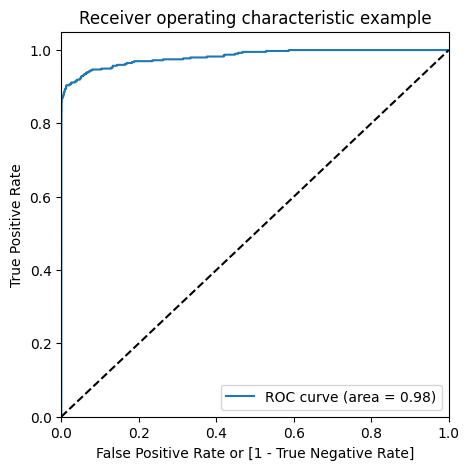

In [121]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

We acheived very good ROC 0.98 on the train set.

Prediction on the test set

In [122]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [123]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56853    13]
 [   46    50]]


In [124]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9989642217618764
Sensitivity:- 0.5208333333333334
Specificity:- 0.9997713923961594
F1-Score:- 0.6289308176100629


In [126]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.79      0.52      0.63        96

    accuracy                           1.00     56962
   macro avg       0.90      0.76      0.81     56962
weighted avg       1.00      1.00      1.00     56962



ROC on the test set

In [129]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

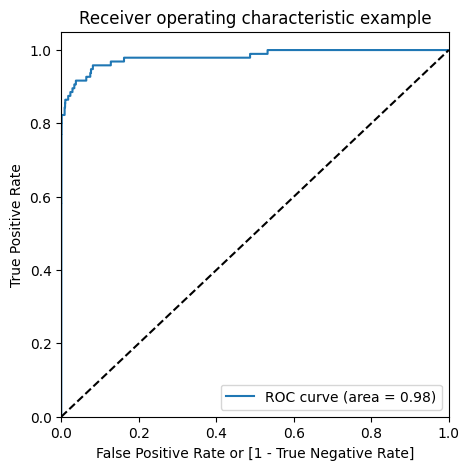

In [130]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see that we have very good ROC on the test set 0.98, which is almost close to 1.

Model summary*

**Train set**

Accuracy = 0.99
Sensitivity = 0.61
Specificity = 0.99
F1-Score = 0.73
ROC = 0.98


**Test set**

Accuracy = 0.99
Sensitivity = 0.52
Specificity = 0.99
F1-Score = 0.62
ROC = 0.98

Overall, the model is performing well in the test set, what it had learnt from the train set.

Decision Tree

In [131]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [132]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [133]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.025940,0.332995,0.024578,0.001209,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923872,0.930131,0.004426,4
1,4.878195,0.247141,0.028253,0.006477,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933180,0.923867,0.930128,0.004428,5
2,4.859716,0.305998,0.027919,0.003984,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933282,0.936720,0.944598,0.938200,0.004737,1
3,4.917588,0.336003,0.028268,0.004646,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933279,0.936720,0.944598,0.938199,0.004738,2
4,9.921101,0.031664,0.029954,0.005472,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924927,0.916462,0.937991,0.926460,0.008856,7
5,9.708785,0.309334,0.028069,0.003011,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924955,0.923907,0.937991,0.928951,0.006407,6
6,9.648524,0.195372,0.032262,0.006353,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933431,0.919684,0.921757,0.924957,0.006051,8
7,10.086733,0.203140,0.026627,0.000380,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933434,0.919684,0.944080,0.932400,0.009987,3


In [134]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9382001202914115
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [135]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

Prediction on the train set

In [136]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [137]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [138]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991704887094297
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7490039840637449


In [140]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [141]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [142]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9534547393930157

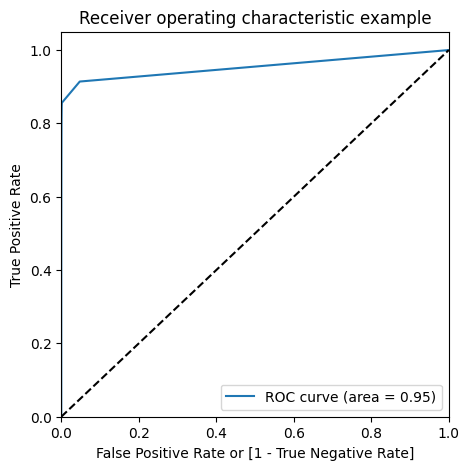

In [143]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

Prediction on the test set

In [144]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [145]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56836    30]
 [   40    56]]


In [146]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-Score:- 0.7490039840637449


In [148]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [149]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [150]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.92174979703748

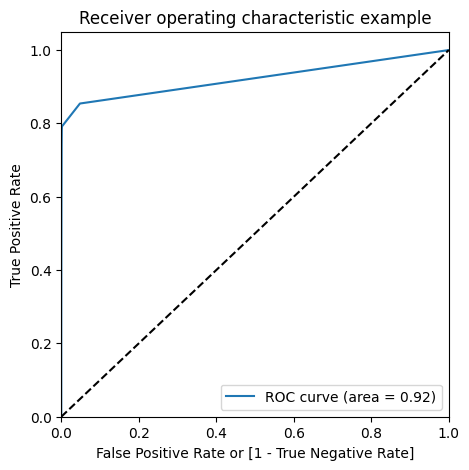

In [151]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model summary*

**Train set**

Accuracy = 0.99
Sensitivity = 1.0
Specificity = 1.0
F1-Score = 0.75
ROC-AUC = 0.95

**Test set**

Accuracy = 0.99
Sensitivity = 0.58
Specificity = 0.99
F-1 Score = 0.75
ROC-AUC = 0.92

Handling data imbalance

1. Undersampling

In [81]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [82]:
# instantiating the random undersampler
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [152]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 383, 1: 383})


Model building on balanced data with Undersampling

Logistic Regression

In [153]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [154]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041005,0.011641,0.005713,0.000665,0.01,{'C': 0.01},0.980068,0.996194,0.990055,0.990534,0.976050,0.986580,0.007395,1,0.991306,0.988612,0.988608,0.988190,0.990901,0.989523,0.001306
1,0.086340,0.015500,0.005457,0.001256,0.1,{'C': 0.1},0.973480,0.995675,0.980281,0.993287,0.978480,0.984241,0.008686,2,0.991957,0.990114,0.990716,0.989787,0.992701,0.991055,0.001108
2,0.091676,0.021120,0.005285,0.000613,1,{'C': 1},0.975000,0.992734,0.974280,0.993632,0.978306,0.982790,0.008598,3,0.992054,0.990945,0.991323,0.989691,0.992659,0.991334,0.001012
3,0.089475,0.022382,0.010786,0.005189,10,{'C': 10},0.970946,0.992734,0.974280,0.990361,0.981083,0.981881,0.008575,4,0.992107,0.989667,0.991152,0.989382,0.993415,0.991145,0.001508
4,0.083766,0.014853,0.005357,0.000188,100,{'C': 100},0.972635,0.992734,0.972908,0.992255,0.978306,0.981768,0.008990,5,0.991744,0.989667,0.991482,0.989180,0.993436,0.991102,0.001534
5,0.079532,0.014393,0.008366,0.003643,1000,{'C': 1000},0.972128,0.993253,0.972908,0.991566,0.974835,0.980938,0.009423,6,0.992022,0.989890,0.991482,0.989318,0.992882,0.991119,0.001327


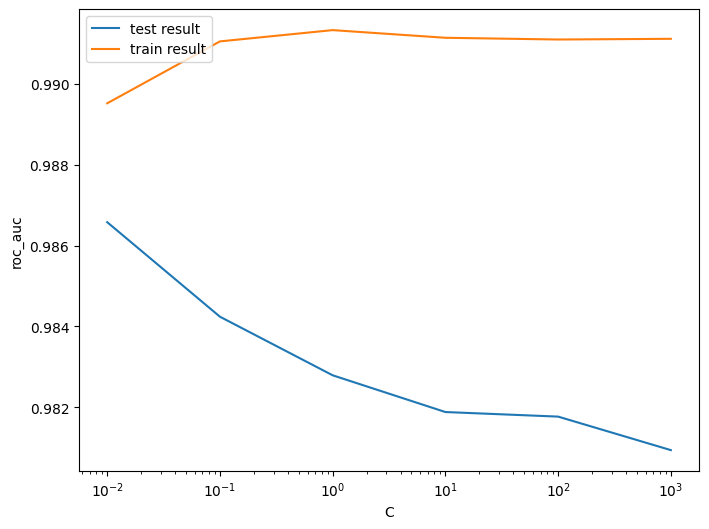

In [155]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [156]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9865799508691996 at C = 0.01


Logistic regression with optimal C

In [157]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

Prediction on the train set

In [158]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[377   6]
 [ 30 353]]


In [159]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [160]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9530026109660574
Sensitivity:- 0.9216710182767625
Specificity:- 0.9843342036553525
F1-Score:- 0.9514824797843666


In [161]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       383
           1       0.98      0.92      0.95       383

    accuracy                           0.95       766
   macro avg       0.95      0.95      0.95       766
weighted avg       0.95      0.95      0.95       766



In [162]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9904287301706332

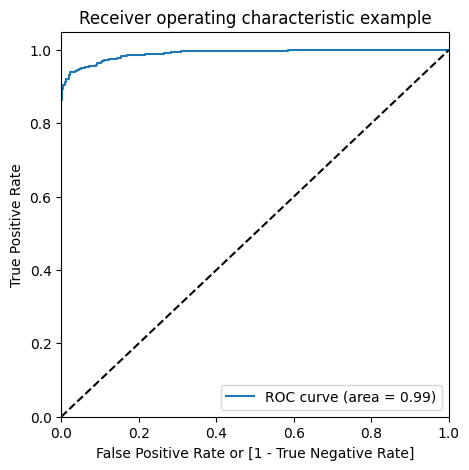

In [163]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

Prediction on the test set

In [164]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55321  1545]
 [   10    86]]


In [165]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [166]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9727010989782662
Sensitivity:- 0.8958333333333334
Specificity:- 0.9728308655435586


In [167]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.05      0.90      0.10        96

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [168]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [169]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9743342169896481

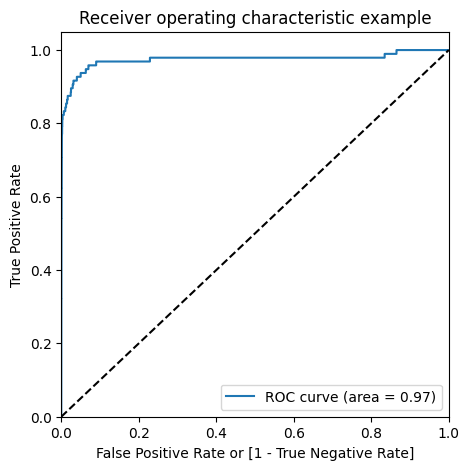

In [170]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model summary*

Train set

Accuracy = 0.95
Sensitivity = 0.92
Specificity = 0.98
ROC = 0.99

Test set

Accuracy = 0.97
Sensitivity = 0.90
Specificity = 0.97
ROC = 0.97

Oversampling

In [173]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [174]:
# instantiating the random oversampler
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [175]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


Logistic Regression

In [176]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [189]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.187632,0.785611,0.062742,0.017707,0.01,{'C': 0.01},0.987294,0.987010,0.987900,0.987399,0.987872,0.987495,0.000344,5,0.987358,0.987271,0.987715,0.987798,0.987410,0.987511,0.000208
1,8.374533,0.502396,0.106990,0.040895,0.1,{'C': 0.1},0.987416,0.987279,0.987936,0.987047,0.987916,0.987519,0.000353,3,0.987491,0.987539,0.987744,0.987439,0.987482,0.987539,0.000107
2,7.154657,0.754497,0.067541,0.045406,1,{'C': 1},0.987399,0.987238,0.987778,0.987020,0.987929,0.987473,0.000337,6,0.987424,0.987497,0.987572,0.987317,0.987514,0.987465,0.000088
3,6.870392,0.702543,0.046256,0.001161,10,{'C': 10},0.987314,0.987140,0.987872,0.987013,0.988193,0.987506,0.000452,4,0.987382,0.987396,0.987664,0.987387,0.987810,0.987528,0.000177
4,7.473823,1.109703,0.069783,0.042035,100,{'C': 100},0.987312,0.987537,0.987763,0.987854,0.988223,0.987738,0.000307,1,0.987399,0.987747,0.987519,0.988225,0.987802,0.987738,0.000284
5,8.628788,1.039238,0.070334,0.032575,1000,{'C': 1000},0.987354,0.987444,0.987669,0.987290,0.988340,0.987620,0.000382,2,0.987456,0.987681,0.987465,0.987700,0.987938,0.987648,0.000178


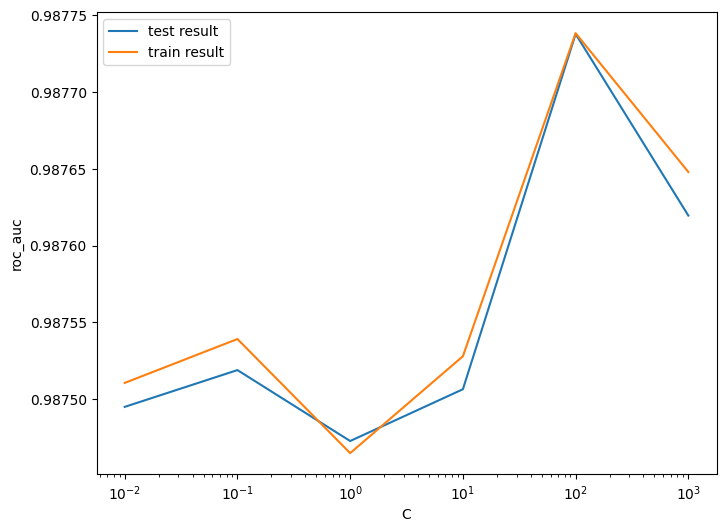

In [190]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [191]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9877377841584375 at C = 100


In [192]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.1)

In [193]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

Prediction on the train set

In [194]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [195]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[222261   5188]
 [ 17300 210149]]


In [196]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [197]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9505647419861155
Sensitivity:- 0.9239389929170935
Specificity:- 0.9771904910551377
F1-Score:- 0.9492124863929754


In [198]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



Prediction on the test set

In [201]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55529  1337]
 [   12    84]]


In [202]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [203]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.97631754503002
Sensitivity:- 0.875
Specificity:- 0.9764885872050083


In [204]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.88      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [205]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9679215722048324

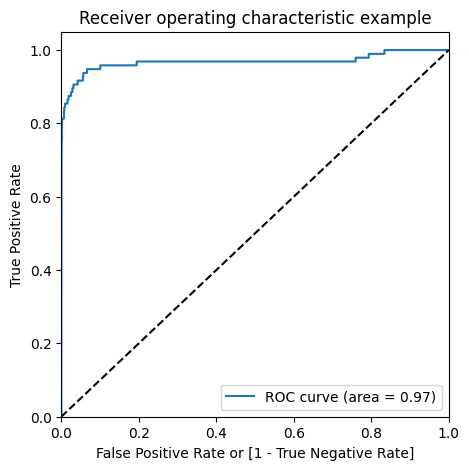

In [206]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)